<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/N_Grams_%26_Smoothing_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  N-grams and Language Modeling

### Dependency installation

In [ ]:
import spacy
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# downlaod the spaCy model
!python -m spacy download en_core_web_md
# Load the spaCy model (using 'en_core_web_md' for efficiency)
nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Sample Text Data

In [ ]:
train_text = """The AI is transforming industries by enhancing machine learning. With advancements in deep learning, we are seeing improvements in data science. Companies are adopting automation to leverage big data for better outcomes. The future of cybersecurity lies in its integration with cloud computing. Investing in quantum computing is crucial for artificial intelligence success. The rise of neural networks is reshaping industries through data visualization. Thanks to natural language processing, we are witnessing advancements in computer vision. Organizations are utilizing blockchain to harness digital transformation for enhanced efficiency. The evolution of augmented reality is linked to its synergy with virtual reality. Committing resources to machine learning is essential for algorithm advancement. The AI is transforming industries by enhancing automation. With advancements in data science, we are seeing improvements in cybersecurity. Companies are adopting cloud computing to leverage deep learning for better outcomes. The future of quantum computing lies in its integration with big data. Investing in artificial intelligence is crucial for neural networks success. The rise of computer vision is reshaping industries through natural language processing. Thanks to digital transformation, we are witnessing advancements in augmented reality. Organizations are utilizing data visualization to harness machine learning for enhanced efficiency. The evolution of deep learning is linked to its synergy with algorithm. Committing resources to blockchain is essential for cybersecurity advancement. The AI is transforming industries by enhancing cloud computing. With advancements in data science, we are seeing improvements in quantum computing. Companies are adopting big data to leverage virtual reality for better outcomes. The future of automation lies in its integration with neural networks. Investing in artificial intelligence is crucial for deep learning success. The rise of data visualization is reshaping industries through machine learning. Thanks to natural language processing, we are witnessing advancements in cybersecurity. Organizations are utilizing cloud computing to harness data science for enhanced efficiency. The evolution of augmented reality is linked to its synergy with artificial intelligence. Committing resources to computer vision is essential for blockchain advancement. The AI is transforming industries by enhancing big data. With advancements in machine learning, we are seeing improvements in deep learning. Companies are adopting automation to leverage cybersecurity for better outcomes. The future of quantum computing lies in its integration with data visualization. Investing in neural networks is crucial for natural language processing success. The rise of algorithm is reshaping industries through cloud computing. Thanks to digital transformation, we are witnessing advancements in computer vision. Organizations are utilizing machine learning to harness deep learning for enhanced efficiency. The evolution of big data is linked to its synergy with cybersecurity. Committing resources to data science is essential for automation advancement. The AI is transforming industries by enhancing artificial intelligence. With advancements in quantum computing, we are seeing improvements in blockchain. Companies are adopting deep learning to leverage data visualization for better outcomes. The future of augmented reality lies in its integration with machine learning. Investing in natural language processing is crucial for neural networks success. The rise of automation is reshaping industries through cybersecurity. Thanks to big data, we are witnessing advancements in cloud computing. Organizations are utilizing computer vision to harness data science for enhanced efficiency. The evolution of digital transformation is linked to its synergy with algorithm. Committing resources to data visualization is essential for deep learning advancement. The AI is transforming industries by enhancing cybersecurity. With advancements in data science, we are seeing improvements in quantum computing. Companies are adopting artificial intelligence to leverage automation for better outcomes. The future of machine learning lies in its integration with digital transformation. Investing in neural networks is crucial for big data success. The rise of data visualization is reshaping industries through deep learning. Thanks to natural language processing, we are witnessing advancements in artificial intelligence. Organizations are utilizing cloud computing to harness quantum computing for enhanced efficiency. The evolution of automation is linked to its synergy with machine learning. Committing resources to blockchain is essential for cybersecurity advancement. The AI is transforming industries by enhancing data science. With advancements in deep learning, we are seeing improvements in natural language processing. Companies are adopting automation to leverage data visualization for better outcomes. The future of machine learning lies in its integration with cybersecurity. Investing in artificial intelligence is crucial for algorithm success. The rise of cloud computing is reshaping industries through quantum computing. Thanks to digital transformation, we are witnessing advancements in neural networks. Organizations are utilizing deep learning to harness big data for enhanced efficiency. The evolution of computer vision is linked to its synergy with data science. Committing resources to natural language processing is essential for automation advancement. The AI is transforming industries by enhancing algorithm. With advancements in machine learning, we are seeing improvements in data visualization. Companies are adopting quantum computing to leverage deep learning for better outcomes. The future of automation lies in its integration with artificial intelligence. Investing in cybersecurity is crucial for big data success. The rise of data science is reshaping industries through cloud computing. Thanks to neural networks, we are witnessing advancements in digital transformation. Organizations are utilizing computer vision to harness quantum computing for enhanced efficiency. The evolution of machine learning is linked to its synergy with data visualization. Committing resources to deep learning is essential for cybersecurity advancement. The AI is transforming industries by enhancing cloud computing. With advancements in data science, we are seeing improvements in artificial intelligence. Companies are adopting automation to leverage machine learning for better outcomes. The future of big data lies in its integration with digital transformation. Investing in quantum computing is crucial for algorithm success. The rise of deep learning is reshaping industries through natural language processing. Thanks to cybersecurity, we are witnessing advancements in data science. Organizations are utilizing automation to harness big data for enhanced efficiency. The evolution of cloud computing is linked to its synergy with artificial intelligence. Committing resources to data visualization is essential for deep learning advancement. The AI is transforming industries by enhancing natural language processing. With advancements in machine learning, we are seeing improvements in quantum computing. Companies are adopting deep learning to leverage cloud computing for better outcomes. The future of automation lies in its integration with data science. Investing in cybersecurity is crucial for big data success. The rise of algorithm is reshaping industries through artificial intelligence. Thanks to machine learning, we are witnessing advancements in digital transformation. Organizations are utilizing computer vision to harness quantum computing for enhanced efficiency. The evolution of data visualization is linked to its synergy with automation. Committing resources to deep learning is essential for cybersecurity advancement.
"""
test_text = """The rise of AI is reshaping industries through machine learning. Thanks to advancements in deep learning, we are witnessing improvements in data science. Organizations are utilizing big data to harness cloud computing for enhanced efficiency. The future of cybersecurity lies in its integration with artificial intelligence. Investing in quantum computing is crucial for neural networks success. The evolution of natural language processing is linked to its synergy with data visualization. Committing resources to digital transformation is essential for algorithm advancement. The AI is transforming industries by enhancing automation. With advancements in machine learning, we are seeing improvements in deep learning. Companies are adopting big data to leverage data science for better outcomes. The future of AI lies in its integration with quantum computing. Investing in natural language processing is crucial for deep learning success. The rise of computer vision is reshaping industries through cybersecurity. Thanks to machine learning, we are witnessing advancements in cloud computing. Organizations are utilizing automation to harness AI for enhanced efficiency.
"""

## Preprocessing (Tokenization using spaCy)

In [ ]:
def preprocess_spacy(text):
    doc = nlp(text.lower())  # Convert to lowercase and process with spaCy
    tokens = [token.text for token in doc if not token.is_punct]  # Remove punctuation
    return tokens

train_data = preprocess_spacy(train_text)
test_data = preprocess_spacy(test_text)
print(train_text[:100])

The AI is transforming industries by enhancing machine learning. With advancements in deep learning,


## Heatmap and Cosine Similarity

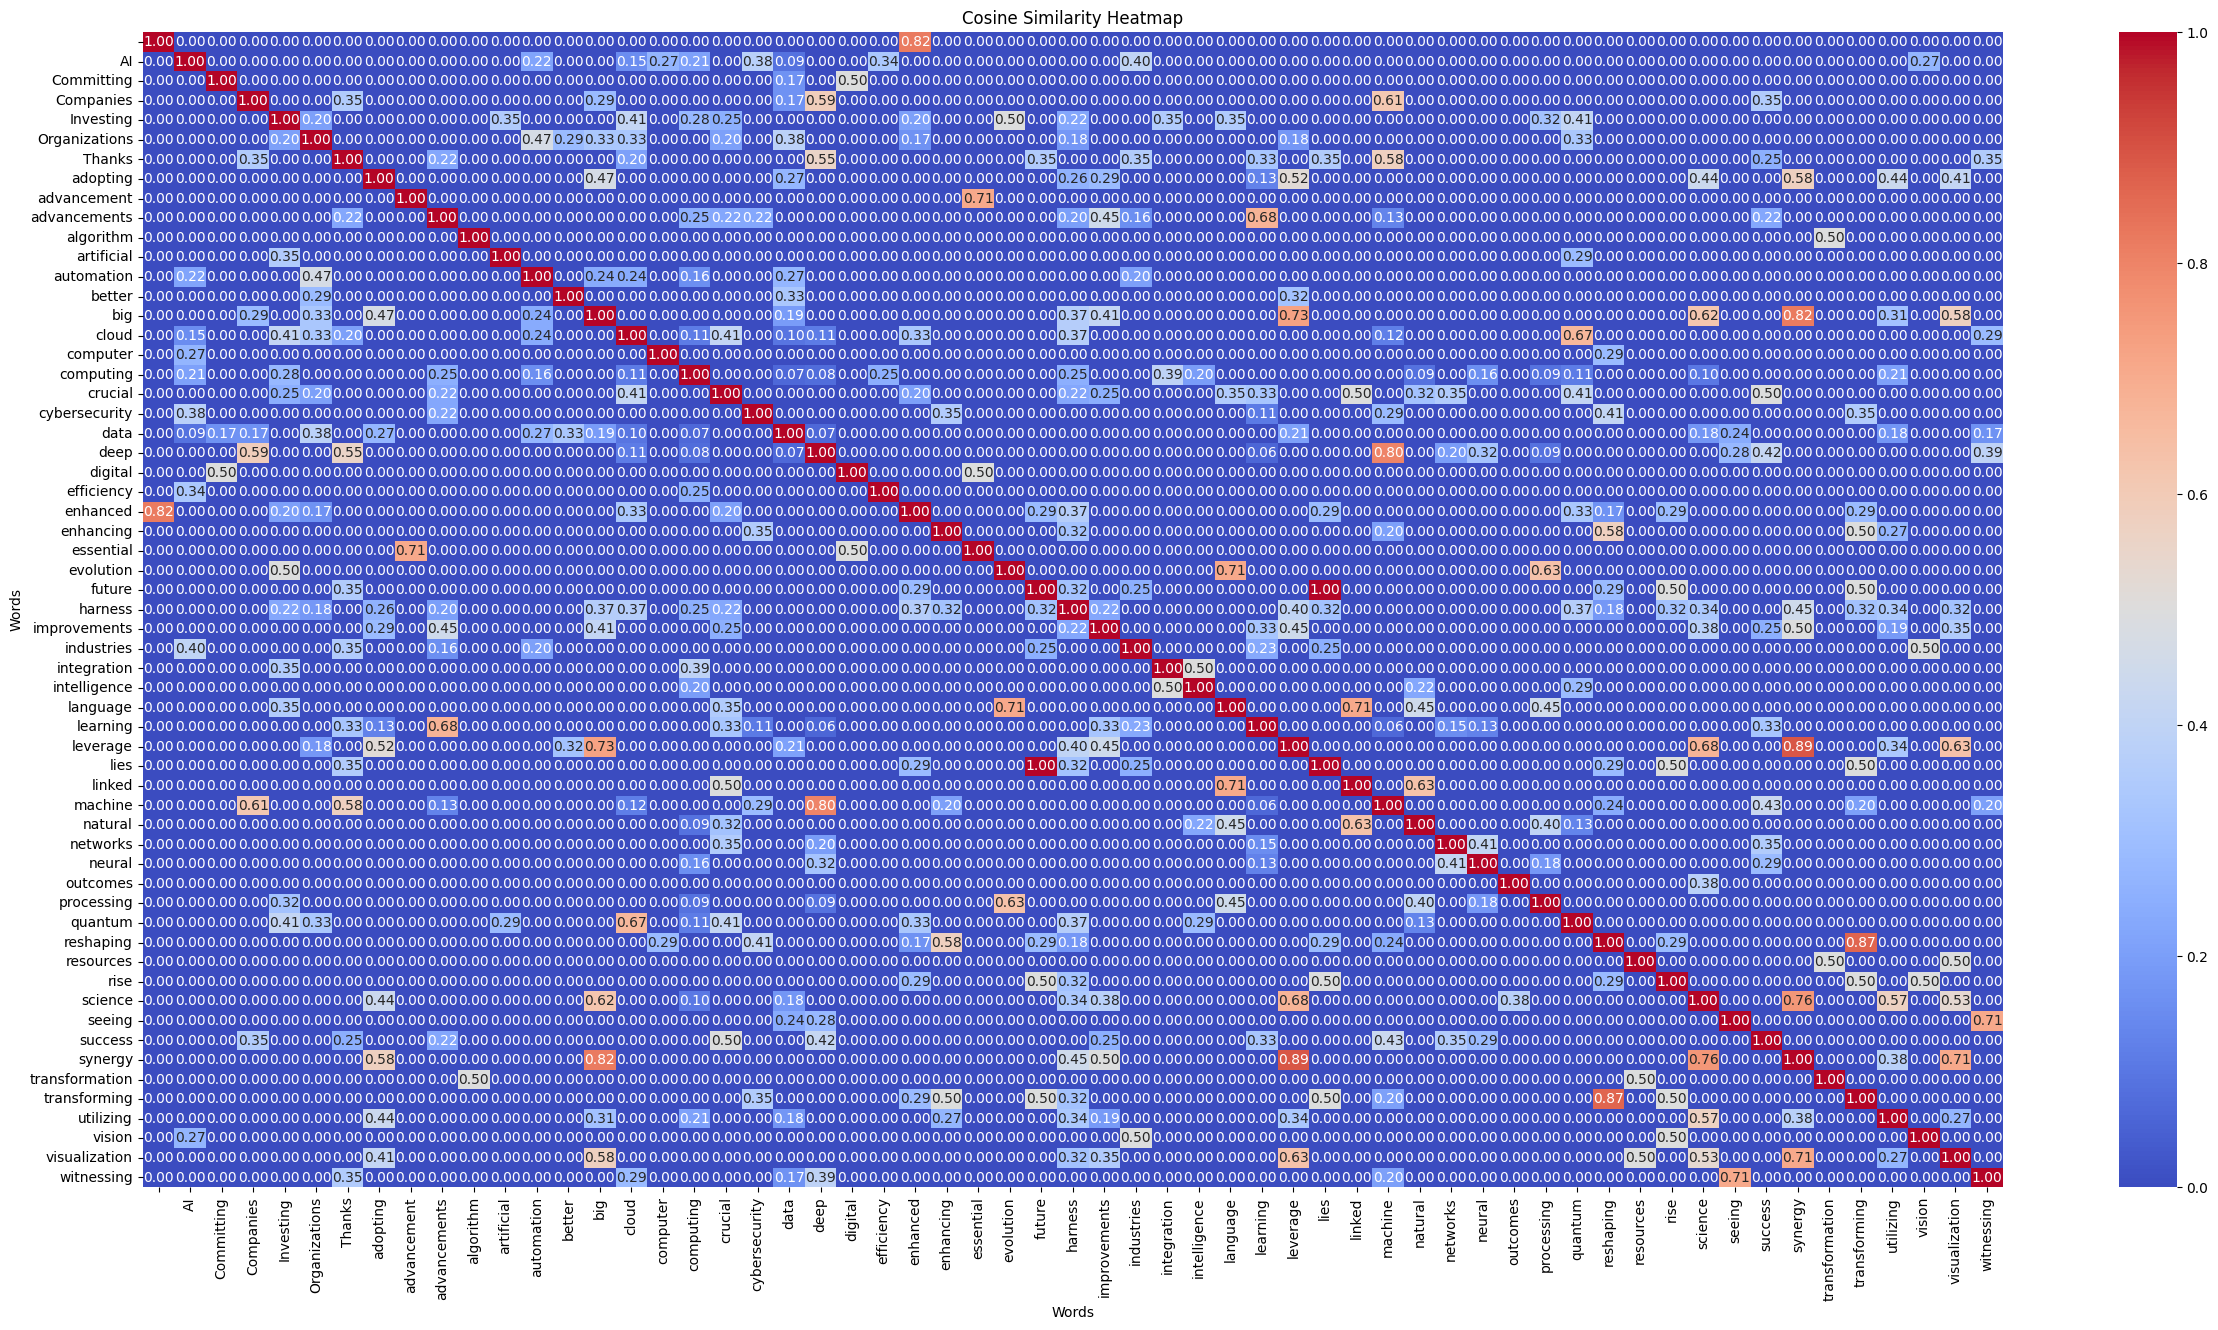

                \n  AI  Committing  Companies  Investing  Organizations  \
\n               0   0           0          0          0              0   
AI               0   0           0          0          0              0   
Committing       0   0           0          0          0              0   
Companies        0   0           0          0          0              0   
Investing        0   0           0          0          0              0   
Organizations    0   0           0          0          0              0   
Thanks           0   0           0          0          0              0   
adopting         0   0           0          1          0              0   
advancement      0   0           0          0          0              0   
advancements     0   0           0          0          0              0   
algorithm        0   0           0          0          0              0   
artificial       0   0           0          0          0              0   
automation       0   0   

In [ ]:
doc = nlp(test_text)

def create_co_occurrence_matrix(doc, window_size=2):
    vocab = set(token.text for token in doc if not token.is_stop and not token.is_punct)
    vocab = sorted(vocab)  # Sort for consistent ordering
    co_occurrence = pd.DataFrame(0, index=vocab, columns=vocab)

    for i, token in enumerate(doc):
        if token.is_stop or token.is_punct:
            continue
        # Get the context window
        start = max(0, i - window_size)
        end = min(len(doc), i + window_size + 1)
        context_tokens = [doc[j].text for j in range(start, end) if j != i and not doc[j].is_stop and not doc[j].is_punct]

        for context in context_tokens:
            co_occurrence.at[token.text, context] += 1

    return co_occurrence

# Create co-occurrence matrix
co_occurrence_matrix = create_co_occurrence_matrix(doc)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(co_occurrence_matrix)
cosine_sim_df = pd.DataFrame(cosine_similarities, index=co_occurrence_matrix.index, columns=co_occurrence_matrix.index)

# Visualize with a heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Words')
plt.ylabel('Words')
plt.show()
print(co_occurrence_matrix)

## N-gram Construction

In [ ]:
def build_ngrams_spacy(data, n):
    return [tuple(data[i:i + n]) for i in range(len(data) - n + 1)]

# Build unigram, bigram, and trigram models
unigrams = build_ngrams_spacy(train_data, 1)
bigrams = build_ngrams_spacy(train_data, 2)
trigrams = build_ngrams_spacy(train_data, 3)

# Calculate probabilities
def calculate_probabilities_spacy(ngrams):
    ngram_counts = Counter(ngrams)
    total_counts = sum(ngram_counts.values())
    probabilities = {ngram: count / total_counts for ngram, count in ngram_counts.items()}
    return probabilities

unigram_probs = calculate_probabilities_spacy(unigrams)
bigram_probs = calculate_probabilities_spacy(bigrams)
trigram_probs = calculate_probabilities_spacy(trigrams)

## Evaluation

In [ ]:
def evaluate_model_spacy(ngram_probs, test_data, n):
    log_probabilities = []
    for i in range(len(test_data) - n + 1):
        ngram = tuple(test_data[i:i + n])
        prob = ngram_probs.get(ngram, 1e-10)  # Smoothing for unseen n-grams
        log_probabilities.append(np.log(prob))

    return log_probabilities

# Calculate log-probabilities for unigram, bigram, and trigram
unigram_log_probs = evaluate_model_spacy(unigram_probs, test_data, 1)
bigram_log_probs = evaluate_model_spacy(bigram_probs, test_data, 2)
trigram_log_probs = evaluate_model_spacy(trigram_probs, test_data, 3)

# Calculate perplexity
def perplexity(log_probs):
    return np.exp(-np.mean(log_probs))

unigram_perplexity = perplexity(unigram_log_probs)
bigram_perplexity = perplexity(bigram_log_probs)
trigram_perplexity = perplexity(trigram_log_probs)
report_spacy = {
    "Unigram Perplexity": unigram_perplexity,
    "Bigram Perplexity": bigram_perplexity,
    "Trigram Perplexity": trigram_perplexity,
}

report_spacy

{'Unigram Perplexity': 59.93795262650224,
 'Bigram Perplexity': 641.5243109217986,
 'Trigram Perplexity': 9183.196224857791}

# Smoothing Techniques (Laplace/ Add-1 Smoothing)

## Calculate probabilities with smoothing

In [ ]:
from collections import Counter

# Step 3: N-gram Construction
def build_ngrams_spacy(data, n):
    """Constructs n-grams from the tokenized data."""
    return [tuple(data[i:i + n]) for i in range(len(data) - n + 1)]

# Step 4: Calculate probabilities with Laplace smoothing
def calculate_probabilities_spacy(ngrams, n_minus_1_grams=None, smoothing=1):
    """Calculates n-gram probabilities with Laplace smoothing."""
    ngram_counts = Counter(ngrams)
    total_counts = sum(ngram_counts.values())

    # For unigrams, just return the probability
    if n_minus_1_grams is None:
        probabilities = {ngram: (count + smoothing) / (total_counts + smoothing * len(ngram_counts))
                         for ngram, count in ngram_counts.items()}
    else:
        # Conditional probabilities for bigrams/trigrams
        n_minus_1_counts = Counter(n_minus_1_grams)
        probabilities = {ngram: (count + smoothing) / (n_minus_1_counts[ngram[:-1]] + smoothing * len(n_minus_1_counts))
                         for ngram, count in ngram_counts.items()}

    return probabilities

# Building n-grams
unigrams = build_ngrams_spacy(train_data, 1)
bigrams = build_ngrams_spacy(train_data, 2)
trigrams = build_ngrams_spacy(train_data, 3)

# For bigrams and trigrams, use the n-1 grams for conditional probabilities
unigram_probs = calculate_probabilities_spacy(unigrams)  # Simple probability
bigram_probs = calculate_probabilities_spacy(bigrams, unigrams)  # Conditional probability P(w2 | w1)
trigram_probs = calculate_probabilities_spacy(trigrams, bigrams)  # Conditional probability P(w3 | w1, w2)


## Evaluation

In [ ]:
def evaluate_model_spacy(ngram_probs, test_data, n):
    log_probabilities = []
    for i in range(len(test_data) - n + 1):
        ngram = tuple(test_data[i:i + n])
        prob = ngram_probs.get(ngram, 1e-10)  # Smoothing for unseen n-grams
        log_probabilities.append(np.log(prob))

    return log_probabilities

# Calculate log-probabilities for unigram, bigram, and trigram
unigram_log_probs = evaluate_model_spacy(unigram_probs, test_data, 1)
bigram_log_probs = evaluate_model_spacy(bigram_probs, test_data, 2)
trigram_log_probs = evaluate_model_spacy(trigram_probs, test_data, 3)

# Calculate perplexity
def perplexity(log_probs):
    return np.exp(-np.mean(log_probs))

unigram_perplexity = perplexity(unigram_log_probs)
bigram_perplexity = perplexity(bigram_log_probs)
trigram_perplexity = perplexity(trigram_log_probs)
report_spacy = {
    "Unigram Perplexity": unigram_perplexity,
    "Bigram Perplexity": bigram_perplexity,
    "Trigram Perplexity": trigram_perplexity,
}

report_spacy

{'Unigram Perplexity': 59.94574500646615,
 'Bigram Perplexity': 55.87301221371839,
 'Trigram Perplexity': 2262.045506955705}